# Dataset 3 : AWS SaaS Sales
1. Dataset dapat di download pada link berikut ini.
2. Jangan lupa untuk melakukan data cleaning sebelum lanjut ke tahapan analisis.
3. Siapa stakeholders pada masalah tersebut
4. Laporkan kepada user tentang hal-hal berikut ini :
  - Jumlah order di setiap bulan di tahun 2022 dan 2023.
  - Top 10 Negara asal pembeli.
  - Top 10 Customers.
  - Total sales tertinggi dan terendah (Bulan dan Tahun).
  - Product dengan discount > 50%.
  - Segment & Product yang paling untung & rugi.
  - Negara penghasil profit tertinggi.
  - Periode waktu yang memberikan kerugian pada perusahaan.
5. Buatlah kesimpulan dan rekomendasi dari temuan yang didapatkan. Selain pertanyaan user yang wajib dijawab, lakukan juga analisis tambahan sehingga dapat memberikan kesimpulan yang lebih banyak.

### Oleh Kelompok A:
1. Akbar
2. Ami
3. Dyah
4. Kentani
5. Rangga
6. Zahra

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

### *DATAFRAME aws_df untuk soal nomor 4 (A-C)*

In [3]:
aws_df = pd.read_csv('SaaS-Sales.csv')

### *DATAFRAME aws_df2 untuk soal nomor 4 (D-H)*

In [4]:
aws_df2 = pd.read_csv('SaaS-Sales.csv')

*Check Null*

In [5]:
aws_df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
#Check Duplicate
aws_df.duplicated().sum()

0

### No.2
Jangan lupa untuk melakukan data cleaning sebelum lanjut ke tahapan analisis.

#### Data Cleaning 

#### *CLEAR OUTLIER aws_df*

In [7]:
#sns.histplot(aws_df['Sales'], kde=True)
#plt.title('Distribution of Sales Including Outliers')
#plt.xlabel('Sales')
#plt.ylabel('Density')
#plt.show()

In [8]:
#Q1 = aws_df['Sales'].quantile(0.25)
#Q3 = aws_df['Sales'].quantile(0.75)

#IQR = Q3 - Q1

#The boundaries for outliers
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

#Identify the outliers
#outliers = aws_df[(aws_df['Sales'] < lower_bound) | (aws_df['Sales'] > upper_bound)]

#print(outliers)

In [9]:
#z_scores = np.abs(stats.zscore(aws_df['Sales']))
#threshold = 3
#aws_df_outliers = aws_df[(z_scores > threshold)]
#display(aws_df_outliers)

In [10]:
# Q1 = data_setelah_outliers_sales['Sales'].quantile(0.25)
# print(f'Nilai kuartil pertama: {Q1}')
# Q3 = data_setelah_outliers_sales['Sales'].quantile(0.75)
# print(f'Nilai kuartil ketiga: {Q3}')
# nilai=Q3-Q1

# lower_bound = Q1 - 1.5*nilai
# upper_bound = Q3 + 1.5*nilai
# outliers = data_setelah_outliers_sales[(data_setelah_outliers_sales['Sales'] < lower_bound) | (data_setelah_outliers_sales['Sales'] > upper_bound)]
# # outliers
# # num_outliers = outliers.shape[0]

# # data_setelah_outliers = aws_df[aws_df['Sales'].isin(outliers['Sales'])]

# data_setelah_outliers = aws_df[(aws_df['Sales'] >= lower_bound) & (aws_df['Sales'] <= upper_bound)]
# data_setelah_outliers


In [11]:
#Clear Outlier aws_df disini
# Q1 = aws_df['Profit'].quantile(0.25)
# print(f'Nilai kuartil pertama: {Q1}')
# Q3 = aws_df['Profit'].quantile(0.75)
# print(f'Nilai kuartil ketiga: {Q3}')
# nilai=Q3-Q1

# lower_bound = Q1 - 1.5*nilai
# upper_bound = Q3 + 1.5*nilai
# outliers_sales = aws_df[(aws_df['Profit'] < lower_bound) | (aws_df['Profit'] > upper_bound)]

# data_setelah_outliers_sales = aws_df[~aws_df['Profit'].isin(outliers_sales['Profit'])]

#### *CLEAR OUTLIER di aws_df2*

#### *DROP DUPLICATE*

In [12]:
#Sebelum di drop duplicate
display(aws_df['Order ID'].value_counts())
display(aws_df2['Order ID'].value_counts())
#DROP DUPLICATE dataframe bb untuk menjawab soal nomor 1-3
aws_df.drop_duplicates(subset=['Order ID'],inplace=True)

Order ID
EMEA-2023-100111    14
EMEA-2023-157987    12
AMER-2022-165330    11
EMEA-2022-108504    11
EMEA-2021-131338    10
                    ..
EMEA-2022-157259     1
AMER-2023-107986     1
EMEA-2021-112508     1
APJ-2022-126844      1
AMER-2023-119914     1
Name: count, Length: 5009, dtype: int64

Order ID
EMEA-2023-100111    14
EMEA-2023-157987    12
AMER-2022-165330    11
EMEA-2022-108504    11
EMEA-2021-131338    10
                    ..
EMEA-2022-157259     1
AMER-2023-107986     1
EMEA-2021-112508     1
APJ-2022-126844      1
AMER-2023-119914     1
Name: count, Length: 5009, dtype: int64

In [13]:
#setelah drop duplicate
display(len(aws_df['Order ID']))
display(len(aws_df2['Order ID']))

5009

9994

### No.3
Siapa stakeholders pada masalah tersebut?

Stakeholders for Amazon Web Services (AWS) Software as a Service (SaaS) sales, there could be several categories of stakeholders involved. These could include:

1. **AWS leadership and employees**: These are people who work directly on developing, selling, and supporting AWS SaaS products.

2. **Competitors**: Other cloud service providers might be considered stakeholders as their actions and strategies could affect AWS' strategies and vice versa.

### No.4
Laporkan kepada user tentang hal-hal berikut ini :

A. ➡️ Jumlah order di setiap bulan di tahun 2022 dan 2023.

In [14]:
print("After Drop Duplicate")
aws_df['Order Date'] = pd.to_datetime(aws_df['Order Date'])
aws_df = aws_df[(aws_df['Order Date'].dt.year == 2022) | (aws_df['Order Date'].dt.year == 2023)]
orders_per_month = aws_df.groupby(aws_df['Order Date'].dt.to_period('M')).size()
display(orders_per_month)

After Drop Duplicate


Order Date
2022-01     48
2022-02     44
2022-03     85
2022-04     88
2022-05    109
2022-06     97
2022-07     96
2022-08     91
2022-09    191
2022-10    102
2022-11    186
2022-12    173
2023-01     74
2023-02     52
2023-03    111
2023-04    112
2023-05    130
2023-06    125
2023-07    112
2023-08    110
2023-09    229
2023-10    150
2023-11    252
2023-12    235
Freq: M, dtype: int64

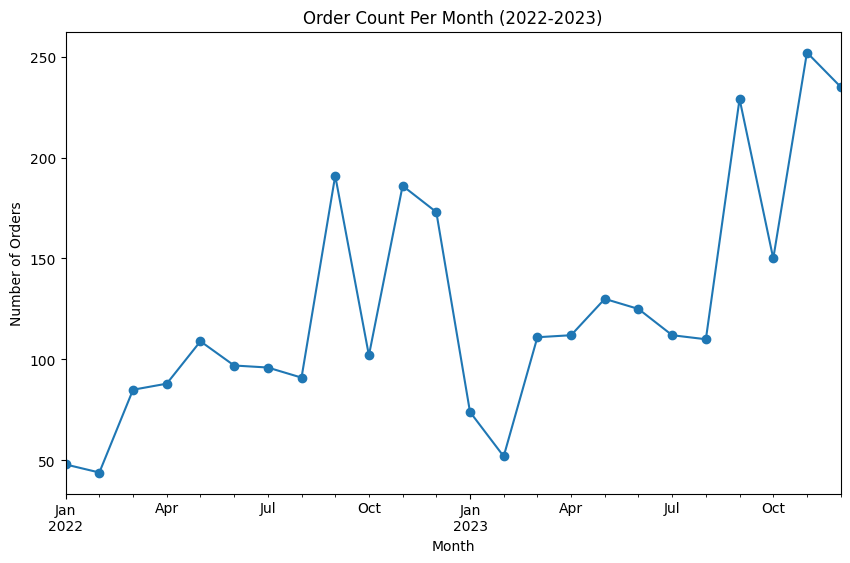

In [15]:
#Visual

#Plotting the data
plt.figure(figsize=(10, 6)) #Figure size
orders_per_month.plot(kind='line', marker='o') #Plotting as a line plot with marker

#Setting title and labels
plt.title('Order Count Per Month (2022-2023)')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

B. ➡️ Top 10 Negara asal pembeli.

In [16]:
top_10_countries = aws_df['Country'].value_counts().head(10)
display(top_10_countries)

# top_10_countries2 = aws_df2['Country'].value_counts().head(10)
# display(top_10_countries2)

Country
United States     619
United Kingdom    332
Japan             286
France            170
Australia         167
Canada            164
Mexico            151
Germany           117
Sweden             84
Brazil             64
Name: count, dtype: int64

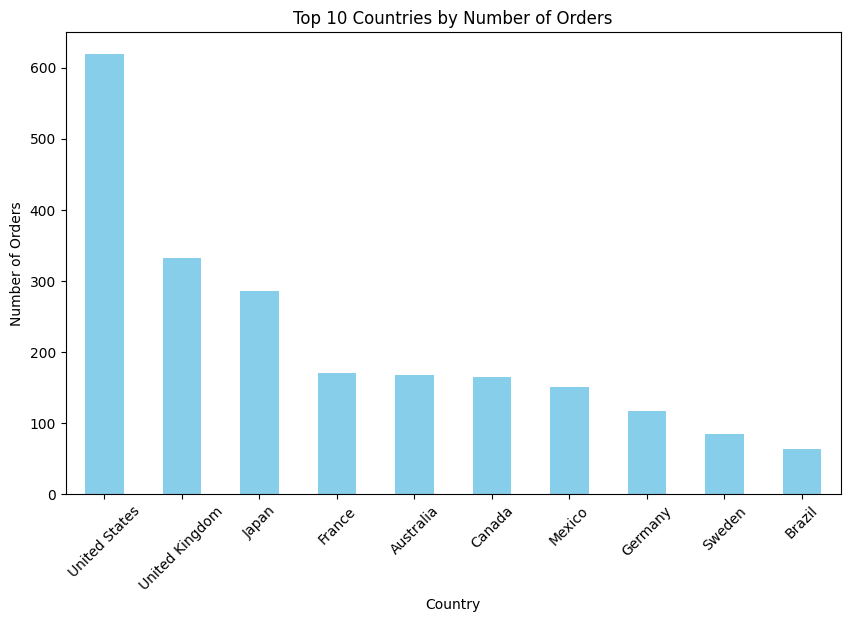

In [17]:
#Visual

plt.figure(figsize=(10, 6)) #Figure size
top_10_countries.plot(kind='bar', color='skyblue') #Bar plot

plt.title('Top 10 Countries by Number of Orders') #Title
plt.xlabel('Country') #x-label
plt.ylabel('Number of Orders') #y-label
plt.xticks(rotation=45)
plt.show()

C. ➡️ Top 10 Customers.

In [18]:
top_10_customers = aws_df['Customer'].value_counts().head(10)
top_10_customers

Customer
Allianz                 67
Ford Motor              62
BNP Paribas             54
Prudential Financial    54
Tyson Foods             52
Chevron                 51
Siemens                 46
Kroger                  45
Comcast                 45
American Express        44
Name: count, dtype: int64

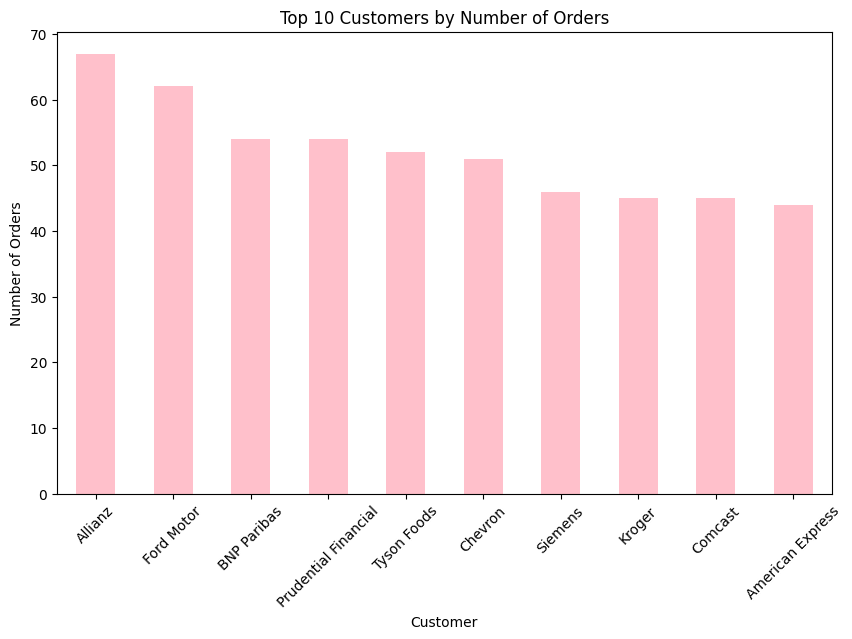

In [19]:
#Visual

plt.figure(figsize=(10, 6)) #Figure size
top_10_customers.plot(kind='bar', color='pink') #Bar plot

plt.title('Top 10 Customers by Number of Orders') #Title
plt.xlabel('Customer') #x-label
plt.ylabel('Number of Orders') #y-label
plt.xticks(rotation=45)
plt.show()

D. ➡️ Total sales tertinggi dan terendah (Bulan dan Tahun).

In [29]:
aws_df2['Order Date'] = pd.to_datetime(aws_df2['Order Date'])

aws_df2['Order Month'] = aws_df2['Order Date'].dt.to_period('M')


aws_sales_month = aws_df2[['Sales','Order Month']].groupby('Order Month').sum()['Sales']
aws_sales_month = aws_sales_month.to_frame().reset_index()
aws_sales_month = aws_sales_month.sort_values(by=['Sales'],ascending=False)
display(aws_sales_month.head(1)) #tertinggi
display(aws_sales_month.tail(1)) #terendah

,Order Month,Sales
46,2023-11,112326.471


,Order Month,Sales
1,2020-02,4810.558


E. ➡️ Product dengan discount > 50%.

In [21]:
aws_df2[['Product','Discount']].loc[aws_df2['Discount'] > 0.5]

,Product,Discount
14,OneView,0.8
15,ContactMatcher,0.8
28,ContactMatcher,0.7
32,ContactMatcher,0.7
36,SaaS Connector Pack,0.6
...,...,...
9870,ContactMatcher,0.7
9877,ContactMatcher,0.7
9903,SaaS Connector Pack,0.6
9920,ContactMatcher,0.8


F. ➡️ Segment & Product yang paling untung & rugi.

In [22]:
df_f = aws_df2.groupby(['Segment','Product'])['Profit'].sum().reset_index()
df_f = df_f.sort_values('Profit',ascending=False)
display(df_f.head(),df_f[df_f['Profit'] < 0].tail())


,Segment,Product,Profit
14,SMB,Alchemy,24083.7106
25,SMB,Site Analytics,23837.1147
18,SMB,Data Smasher,20735.9225
28,Strategic,Alchemy,18990.2789
19,SMB,FinanceHub,16311.3203


,Segment,Product,Profit
20,SMB,Marketing Suite,-4435.6382


G. ➡️ Negara penghasil profit tertinggi.

In [23]:
highest_profit_country = aws_df2.groupby('Country')['Profit'].sum().idxmax()
print("Country with the Highest Profit:")
print(highest_profit_country)

Country with the Highest Profit:
United States


H. ➡️ Periode waktu yang memberikan kerugian pada perusahaan.

In [25]:
#aws_df2['Order Date'] = pd.to_datetime(aws_df2['Order Date'])

#aws_df2['Order Month'] = aws_df2['Order Date'].dt.to_period('M')

#aws_df2.info()

df_h = aws_df2.groupby('Order Month Name')['Profit'].sum().reset_index()
df_h.sort_values('Profit')

,Order Month Name,Profit
4,January 2022,9199.2700
3,February 2022,10281.4733
0,April 2022,13437.8068
5,July 2022,13535.3830
6,June 2022,20899.3345
1,August 2022,21896.7154
8,May 2022,22308.5128
7,March 2022,26813.9991
10,October 2022,31469.6638
9,November 2022,35825.5366
